In [1]:
import tensorflow as tf

In [14]:
IMAGE_SIZE=256
BATCH_SIZE=32
CHANNELS=3
EPOCHS=50

In [60]:
dataset=tf.keras.preprocessing.image_dataset_from_directory(
    "..\dataset\PlantVillage",
    seed=123,
    shuffle=True,
    image_size=(IMAGE_SIZE,IMAGE_SIZE),
    batch_size=BATCH_SIZE,
)

<>:2: SyntaxWarning: invalid escape sequence '\d'
<>:2: SyntaxWarning: invalid escape sequence '\d'
C:\Users\baps\AppData\Local\Temp\ipykernel_17328\1766630398.py:2: SyntaxWarning: invalid escape sequence '\d'
  "..\dataset\PlantVillage",
C:\Users\baps\AppData\Local\Temp\ipykernel_17328\1766630398.py:2: SyntaxWarning: invalid escape sequence '\d'
  "..\dataset\PlantVillage",


TypeError: image_dataset_from_directory() got an unexpected keyword argument 'rotation_range'

In [5]:
dataset.class_names

['pepper_bell', 'potato_image', 'tomato']

In [6]:
plant_classes=dataset.class_names

In [5]:
def get_dataset_partitions_tf(ds, train_split=0.8, val_split=0.1, test_split=0.1, shuffle=True, shuffle_size=10000):
    assert (train_split + test_split + val_split) == 1
    
    ds_size = len(ds)
    
    if shuffle:
        ds = ds.shuffle(shuffle_size, seed=12)
    
    train_size = int(train_split * ds_size)
    val_size = int(val_split * ds_size)
    
    train_ds = ds.take(train_size)    
    val_ds = ds.skip(train_size).take(val_size)
    test_ds = ds.skip(train_size).skip(val_size)
    
    return train_ds, val_ds, test_ds

In [8]:
train_ds, val_ds, test_ds = get_dataset_partitions_tf(dataset)

In [9]:
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
val_ds = val_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
test_ds = test_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)

In [11]:
resize_and_rescale = tf.keras.Sequential([
  tf.keras.layers.Resizing(IMAGE_SIZE, IMAGE_SIZE),
  tf.keras.layers.Rescaling(1./255),
])

In [13]:
data_augmentation = tf.keras.Sequential([
  tf.keras.layers.RandomFlip("horizontal_and_vertical"),
  tf.keras.layers.RandomRotation(0.2),
])

In [14]:
train_ds = train_ds.map(
    lambda x, y: (data_augmentation(x, training=True), y)
).prefetch(buffer_size=tf.data.AUTOTUNE)


In [15]:
input_shape = (BATCH_SIZE, IMAGE_SIZE, IMAGE_SIZE, CHANNELS)
n_classes = 3
model = tf.keras.models.Sequential([
    resize_and_rescale,
    tf.keras.layers.Conv2D(32, kernel_size = (3,3), activation='relu', input_shape=input_shape),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(64,  kernel_size = (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(n_classes, activation='softmax'),
])

model.build(input_shape=input_shape)

c:\Users\baps\OneDrive\Desktop\Projects\aiml\projects\PatatoDecisesClacification\.env\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [16]:
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ sequential (Sequential)         │ (32, 256, 256, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (32, 254, 254, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (32, 127, 127, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (32, 125, 125, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (32, 62, 62, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (32, 60, 60, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (32, 30, 30, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (32, 57600)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (32, 64)               │     3,686,464 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (32, 3)                │           195 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,742,979 (14.28 MB)

 Trainable params: 3,742,979 (14.28 MB)

 Non-trainable params: 0 (0.00 B)

In [18]:
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy']
)

In [20]:
history = model.fit(
    train_ds,
    batch_size=BATCH_SIZE,
    validation_data=val_ds,
    verbose=1,
    epochs=5,
)

Epoch 1/5
516/516 ━━━━━━━━━━━━━━━━━━━━ 541s 1s/step - accuracy: 0.8316 - loss: 0.4829 - val_accuracy: 0.9043 - val_loss: 0.2579
Epoch 2/5
516/516 ━━━━━━━━━━━━━━━━━━━━ 506s 980ms/step - accuracy: 0.9065 - loss: 0.2490 - val_accuracy: 0.9360 - val_loss: 0.1655
Epoch 3/5
516/516 ━━━━━━━━━━━━━━━━━━━━ 496s 960ms/step - accuracy: 0.9278 - loss: 0.1925 - val_accuracy: 0.9126 - val_loss: 0.3631
Epoch 4/5
516/516 ━━━━━━━━━━━━━━━━━━━━ 576s 1s/step - accuracy: 0.9370 - loss: 0.1737 - val_accuracy: 0.9536 - val_loss: 0.1160
Epoch 5/5
516/516 ━━━━━━━━━━━━━━━━━━━━ 597s 1s/step - accuracy: 0.9564 - loss: 0.1221 - val_accuracy: 0.9585 - val_loss: 0.1090


In [21]:
model.evaluate(test_ds)

65/65 ━━━━━━━━━━━━━━━━━━━━ 68s 212ms/step - accuracy: 0.9653 - loss: 0.1004


[0.09727859497070312, 0.9653846025466919]

In [22]:
y_pred=model.predict(test_ds)

65/65 ━━━━━━━━━━━━━━━━━━━━ 12s 182ms/step


In [23]:
y_pred

array([[5.3309027e-06, 7.2028985e-07, 9.9999392e-01],
       [9.7181028e-01, 6.9598011e-03, 2.1229859e-02],
       [1.9676732e-03, 9.9226344e-01, 5.7688430e-03],
       ...,
       [7.2287330e-06, 1.7322201e-02, 9.8267049e-01],
       [8.7915423e-06, 3.6271189e-03, 9.9636406e-01],
       [1.3294281e-03, 1.4376094e-02, 9.8429441e-01]], dtype=float32)

In [24]:
test_ds

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [26]:
for i ,  j in test_ds.take(1):
    print(j)

tf.Tensor([0 2 2 2 1 2 2 2 0 2 2 0 1 2 2 2 2 1 2 2 2 2 2 2 1 2 2 2 2 0 0 2], shape=(32,), dtype=int32)


In [33]:
import numpy as np

y_pred=[np.argmax(y_pred[i]) for i in range(len(y_pred))]
len(y_pred)

2080

In [50]:
y_test=[]
for x,y in test_ds:
    y_test.extend(y.numpy())
    # print(y.numpy())
print(len(y_test))
y_test

2080


[2,
 2,
 2,
 0,
 1,
 2,
 2,
 2,
 2,
 2,
 2,
 0,
 2,
 1,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 1,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 1,
 2,
 2,
 0,
 1,
 2,
 2,
 2,
 1,
 2,
 2,
 0,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 0,
 2,
 2,
 1,
 0,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 1,
 2,
 2,
 0,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 0,
 1,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 0,
 2,
 0,
 0,
 1,
 2,
 2,
 2,
 2,
 2,
 0,
 2,
 2,
 2,
 2,
 2,
 2,
 1,
 0,
 2,
 2,
 0,
 2,
 2,
 2,
 2,
 2,
 1,
 1,
 1,
 2,
 2,
 1,
 0,
 1,
 2,
 2,
 0,
 2,
 1,
 2,
 2,
 2,
 2,
 0,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 0,
 2,
 2,
 2,
 2,
 2,
 0,
 1,
 2,
 0,
 0,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 1,
 2,
 2,
 0,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 0,
 2,
 2,
 2,
 2,
 1,
 2,
 2,
 2,
 1,
 0,
 2,
 2,
 0,
 2,
 0,
 0,
 2,
 2,
 2,
 2,
 2,
 2,
 0,
 2,
 0,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 1,
 2,
 2,
 2,
 2,
 2,
 2,
 1,
 2,
 2,
 2,
 2,
 1,
 0,
 2,
 2,
 2,
 1,
 2,
 0,
 2,
 1,
 2,


In [57]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_pred)

<Axes: >

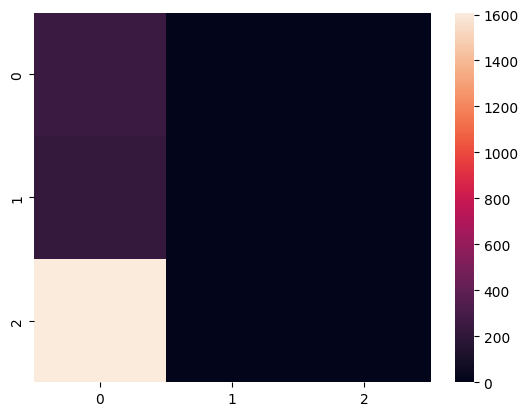

In [59]:
import seaborn as sbn
sbn.heatmap(cm)

In [61]:
model.save("../models/plantClasificationModelWithImbalance.h5")

In [2]:
model=tf.keras.models.load_model("../models/plantClasificationModelWithImbalance.h5")

In [31]:
from  PIL import Image


def image_to_nparry(img):
    img=Image.open(img).convert("RGB").resize((256,256))
    return np.array(img)


In [29]:
np.array(Image.open("../dataset/PlantVillage/pepper_bell/Pepper__bell___Bacterial_spot/0a4c007d-41ab-4659-99cb-8a4ae4d07a55___NREC_B.Spot 1954.JPG").convert("RGB").resize((256,256)))

array([[[164, 151, 143],
        [168, 155, 147],
        [172, 159, 151],
        ...,
        [149, 132, 122],
        [142, 125, 115],
        [153, 136, 126]],

       [[164, 151, 143],
        [167, 154, 146],
        [171, 158, 150],
        ...,
        [140, 123, 113],
        [127, 110, 100],
        [156, 139, 129]],

       [[165, 152, 144],
        [166, 153, 145],
        [170, 157, 149],
        ...,
        [126, 109,  99],
        [108,  91,  81],
        [151, 134, 124]],

       ...,

       [[187, 173, 162],
        [187, 173, 162],
        [180, 166, 155],
        ...,
        [157, 138, 124],
        [149, 130, 116],
        [138, 119, 105]],

       [[170, 156, 145],
        [180, 166, 155],
        [183, 169, 158],
        ...,
        [144, 125, 111],
        [145, 126, 112],
        [191, 172, 158]],

       [[164, 150, 139],
        [184, 170, 159],
        [196, 182, 171],
        ...,
        [167, 148, 134],
        [138, 119, 105],
        [139, 120, 106]]

In [32]:
import numpy as np
pred=model.predict(np.array([image_to_nparry("../dataset/PlantVillage/pepper_bell/Pepper__bell___Bacterial_spot/0a4c007d-41ab-4659-99cb-8a4ae4d07a55___NREC_B.Spot 1954.JPG")]))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 257ms/step


In [33]:
pred

array([[9.9903333e-01, 3.4329863e-04, 6.2333705e-04]], dtype=float32)

## now we  try diffrent aproch for avoiding imbalance in data